In [1]:
import pandas as pd
import seaborn as sns

In [2]:
dates = pd.read_csv("dates.csv")
df = pd.read_csv("leaderboard.csv")
df.head()

,method,CRPS,MASE,rank
0,TiRex,0.650,0.421,5.155
1,Toto_Open_Base_1.0,0.673,0.437,7.577
2,YingLong_300m,0.716,0.463,10.113
3,YingLong_110m,0.726,0.471,10.897
4,TabPFN-TS,0.692,0.460,11.144


In [3]:
df_with_dates = pd.merge(df, dates, on="method")
df_with_dates["date"] = pd.to_datetime(df_with_dates["date"])

In [4]:
methods_sel = [
    'TiRex', 
    'Toto_Open_Base_1.0', 
    'YingLong_300m',
    'TabPFN-TS', 'chronos_bolt_base', 'timesfm_2_0_500m',
    'TEMPO_ensemble',
    'sundial_base_128m', 
    #'TTM-R2-Finetuned', 
    'Moirai_large',
    'PatchTST', 
    'TFT',
    'Chronos_large', 
    'TimesFM',
    'TIDE',
    'DeepAR',
    'VisionTS',
    'Crossformer',
    'Auto_Arima',
    'N-BEATS',
    'Lag-Llama',
    'TTM-R2-Zeroshot',
    'DLinear',
    #'TTM-R1-Zeroshot',
    'Auto_Theta',
    'Auto_ETS'
]

In [5]:
df_with_dates

,method,CRPS,MASE,rank,date
0,TiRex,0.650,0.421,5.155,2025-05-29
1,Toto_Open_Base_1.0,0.673,0.437,7.577,2025-03-18
2,YingLong_300m,0.716,0.463,10.113,2025-05-20
3,YingLong_110m,0.726,0.471,10.897,2025-05-20
4,TabPFN-TS,0.692,0.460,11.144,2025-01-06
5,chronos_bolt_base,0.725,0.485,11.371,2024-11-26
6,timesfm_2_0_500m,0.680,0.465,11.526,2024-12-30
7,TEMPO_ensemble,0.773,0.434,11.711,2023-10-08
8,YingLong_50m,0.738,0.479,11.866,2025-05-20
9,chronos_bolt_small,0.738,0.487,12.423,2024-11-26


Text(0, 0.5, '')

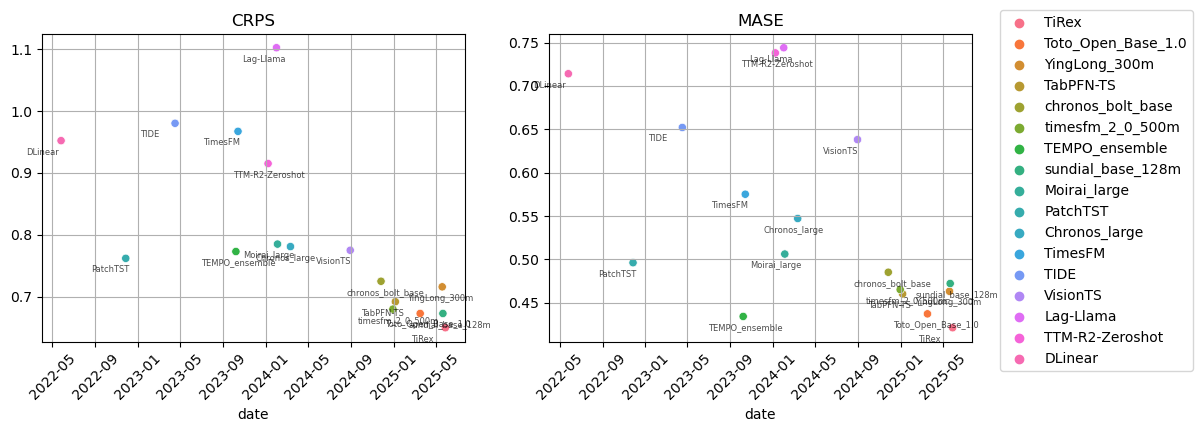

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x = "date"
y = "CRPS"
date_min = "2020-02-04"

ax = axes[0]
df_sel = df_with_dates[
    (df_with_dates.date >= date_min) & (df_with_dates.method.isin(methods_sel))
&     (    df_with_dates.MASE <= 1.0) 
]
sns.scatterplot(
    df_sel,
    x=x,
    y=y,
    ax=ax,
    hue="method",
    legend=False,
)


def add_text(ax):
    # Add text annotations
    for i, row in df_sel.iterrows():
        ax.annotate(row['method'], (row[x], row[y]), 
                    xytext=(-25, -10), textcoords='offset points', 
                    fontsize=6, alpha=0.7)
add_text(ax)
ax.grid()
ax.tick_params(axis='x', rotation=45)
ax.set_title(y)
ax.set_ylabel("")

y = "MASE"

ax = axes[1]

sns.scatterplot(
    df_sel,
    x=x,
    y=y,
    ax=ax,
    hue="method",
    #cmap="set2",
)

add_text(ax)
ax.grid()
ax.tick_params(axis='x', rotation=45)
ax.set_title(y)
ax.legend(bbox_to_anchor=(1.05, 1.1), loc='upper left')
ax.set_ylabel("")




/var/folders/bv/hw2pz0w124z6wd8xbw6rx8n00000gp/T/ipykernel_17988/1509343286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['date_numeric'] = pd.to_datetime(df_sel['date']).astype('int64') // 10**9 / 86400  # days since epoch


Text(0.5, 1.0, 'MASE - improving 0.07 year over year')

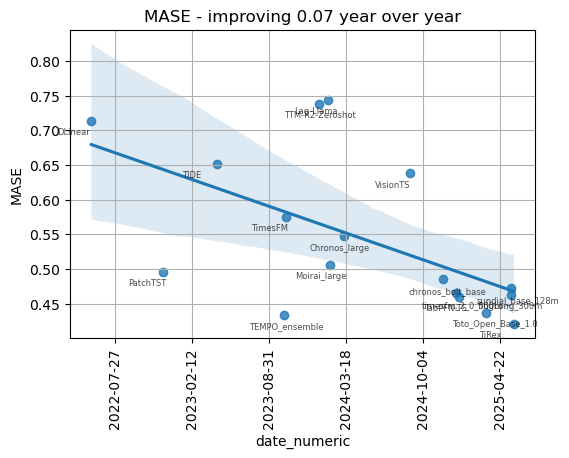

In [7]:
import scipy

df_sel['date_numeric'] = pd.to_datetime(df_sel['date']).astype('int64') // 10**9 / 86400  # days since epoch

y = "MASE"
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

p = sns.regplot(
    df_sel,
    x="date_numeric",
    y=y,
    ax=ax,
    #c="method",
)
add_text(ax)
ax.grid()
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: pd.to_datetime(x, unit='D', origin='unix').strftime('%Y-%m-%d')))


slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())

ax.set_title(f"{y} - improving {-slope * 365:.2f} year over year")


* Propose leaderboard when model is trained on a one day on a H100 (72$)
* Create new leaderboard